In [1]:
# import library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle


In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
# import data
df=pd.read_csv('Admission_Prediction.csv')

In [3]:
# check first five row of the dataset 
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
# check shape of the dataset 
df.shape

(500, 9)

In [5]:
#Summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Preprocessing data 

In [7]:
# finding missing values in variable 
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
# replace missing value with mode values for GRE Score and TOEFL Score variables
for value in['GRE Score','TOEFL Score']:
    df[value].fillna(df[value].mode()[0],inplace=True)

df.isnull().sum()        

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [9]:
# replace missing value with mean values for University Rating variable
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# Create x and y
# dropping the Chance of Admit and Serial No as they are not going to used for prediction
x=df.drop(['Serial No.','Chance of Admit'],axis=1)
# Chance of Admit is the target varibale which shows the chance of probability of admission 
y=df['Chance of Admit']

In [11]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [12]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

# Check Assumptions 

AxesSubplot(0.125,0.125;0.775x0.755)


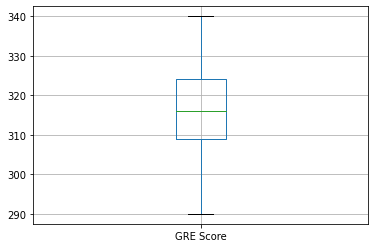

In [13]:
# 1st Assumption: check There should be no outlier in the data 
print(x.boxplot(column='GRE Score'))

AxesSubplot(0.125,0.125;0.775x0.755)


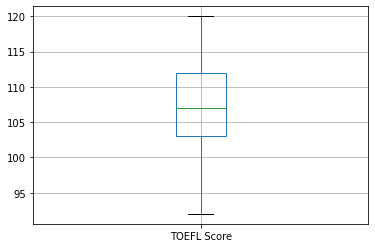

In [14]:
print(x.boxplot(column='TOEFL Score'))

AxesSubplot(0.125,0.125;0.775x0.755)


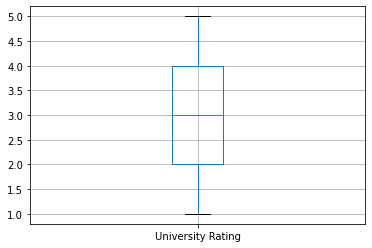

In [15]:
print(x.boxplot(column='University Rating'))


AxesSubplot(0.125,0.125;0.775x0.755)


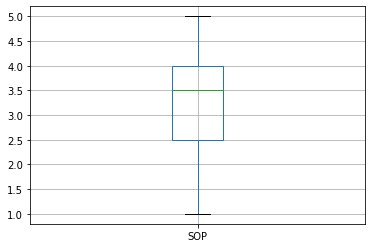

In [16]:
print(x.boxplot(column='SOP'))

AxesSubplot(0.125,0.125;0.775x0.755)


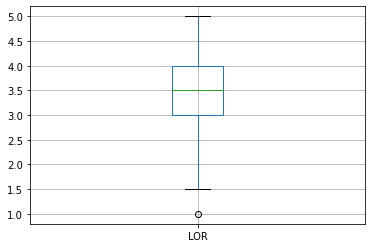

In [17]:
print(x.boxplot(column='LOR'))


AxesSubplot(0.125,0.125;0.775x0.755)


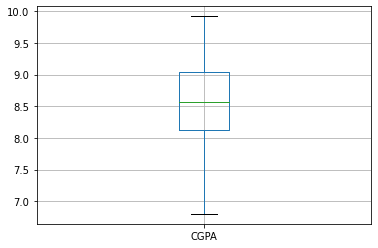

In [18]:
print(x.boxplot(column='CGPA'))

AxesSubplot(0.125,0.125;0.775x0.755)


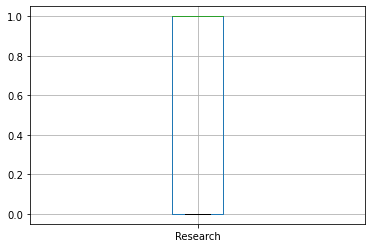

In [19]:
print(x.boxplot(column='Research'))

There should be no outlier in this data 


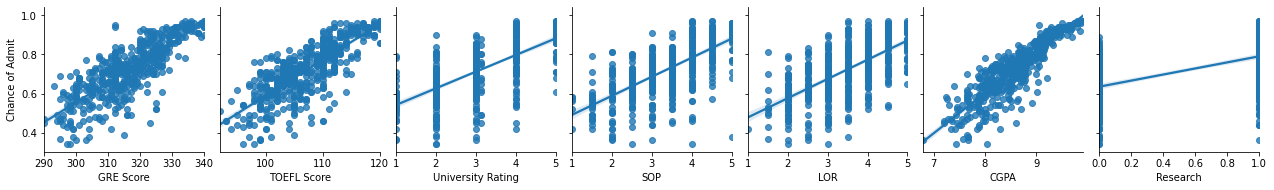

In [20]:
#2nd Assumption: Check assumption of Linarity 
# Every ind var sholud have linear relationship with the dep var
sns.pairplot(df,x_vars =x.columns,y_vars='Chance of Admit',kind='reg')

<AxesSubplot:xlabel='Chance of Admit'>

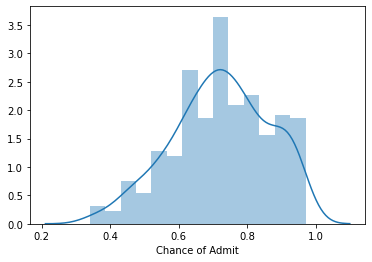

In [21]:
#3rd Assumption : Check assumption of normality 
# dep var should follow approximate normal distribustion 
sns.distplot(y,hist=True)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.813091           0.620704  0.606973   
TOEFL Score         0.813091     1.000000           0.643663  0.644384   
University Rating   0.620704     0.643663           1.000000  0.712991   
SOP                 0.606973     0.644384           0.712991  1.000000   
LOR                 0.521241     0.538830           0.606291  0.663707   
CGPA                0.816190     0.803894           0.696592  0.712154   
Research            0.545971     0.464678           0.424429  0.408116   

                        LOR      CGPA  Research  
GRE Score          0.521241  0.816190  0.545971  
TOEFL Score        0.538830  0.803894  0.464678  
University Rating  0.606291  0.696592  0.424429  
SOP                0.663707  0.712154  0.408116  
LOR                1.000000  0.637469  0.372526  
CGPA               0.637469  1.000000  0.501311  
Research           0.372526  0.501311  1.000000  


<AxesSubplot:>

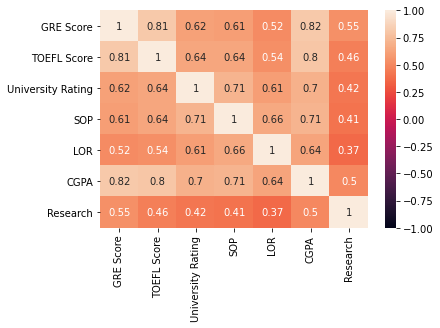

In [22]:
#4th Assumption:check there should be no multicolinarity in the data
corr_df=x.corr(method='pearson')
print(corr_df)

#plot heatmap
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [23]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_label=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [24]:
# splitting the data into train and test 
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)


In [25]:
# Bulid the model
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
#train the model
lm.fit(train_x,train_y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#predict the model
y_pred=lm.predict(test_x)

In [27]:
y_pred
y_pred.shape

(165,)

In [28]:
test_y.shape

(165,)

In [29]:
new_df=pd.DataFrame()
new_df=test_x
new_df['Chance of Admit']=test_y
new_df['prediction of Admit']=y_pred
new_df


C:\Users\Abhishek\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Abhishek\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,prediction of Admit
69,328.0,115.0,4.0,4.5,4.0,9.16,1,0.78,0.858684
29,310.0,99.0,2.0,1.5,2.0,7.30,0,0.54,0.471002
471,311.0,103.0,3.0,2.0,4.0,8.09,0,0.64,0.628010
344,295.0,96.0,2.0,1.5,2.0,7.34,0,0.47,0.445781
54,322.0,110.0,3.0,3.0,3.5,8.00,0,0.70,0.645986
...,...,...,...,...,...,...,...,...,...
5,330.0,115.0,5.0,4.5,3.0,9.34,1,0.90,0.870355
269,308.0,110.0,4.0,4.5,5.0,8.34,0,0.77,0.701326
267,314.0,107.0,3.0,3.0,3.5,8.17,1,0.73,0.672202
456,299.0,100.0,2.0,2.0,2.0,7.88,0,0.51,0.534626


In [30]:
# Calculate accuracy of the model
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(test_y,y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(test_y,y_pred))
print(rmse)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adjusted_r_squared)

0.8259701213453239
0.059767683262547916
0.8234940864864159


In [31]:
# check model using new values 
lm.predict([[300,110,5,5,5,10,1]])

array([0.93409108])

In [32]:
#  Saving the model to the local file system
filename='finalized_model.pickle'
pickle.dump(lm,open(filename,'wb'))

In [33]:
# load pickle model and put values for prediction
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict([[300,110,5,5,5,10,1]])
a

array([0.93409108])